In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Importing the libraries
import matplotlib.pyplot as plt
import datetime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#ubah pathnya sesuai lokasi dataset 
dataset=pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv - Google_Stock_Price_Train.csv.csv',index_col="Date",parse_dates=True)

##Explore Dataset

In [5]:
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
#code here
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [7]:
len(dataset)

1258

In [8]:
dataset.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

#Visualize

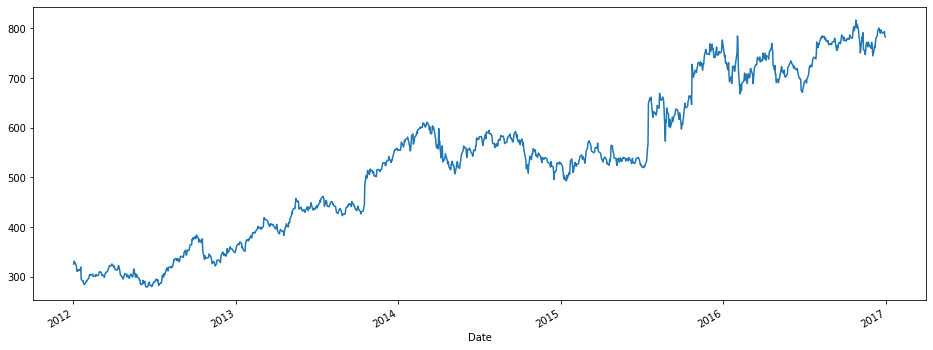

In [9]:
dataset['Open'].plot(figsize=(16,6))

In [10]:
# convert column "a" of a DataFrame
dataset["Close"] = dataset["Close"].str.replace(',', '').astype(float)

In [11]:
dataset["Volume"] = dataset["Volume"].str.replace(',', '').astype(float)

In [12]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


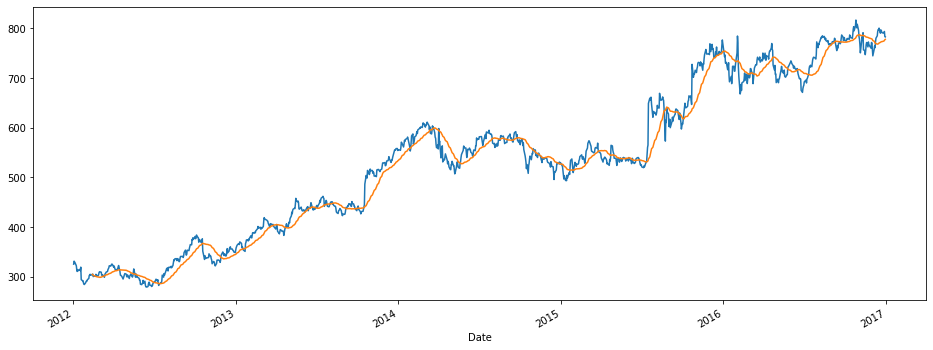

In [13]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Open'].plot()

In [14]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train.shape

(1198, 60, 1)

In [18]:
#Building the RNN
#Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
# Initialising the RNN
model = Sequential()

In [20]:
# Adding the first LSTM layer and some Dropout regularisation
# Adding a second LSTM layer and some Dropout regularisation
# Adding a third LSTM layer and some Dropout regularisation
# Adding a fourth LSTM layer and some Dropout regularisation
# Adding the output layer
# Code here
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape =(60,1)) )
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,465
Trainable params: 52,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the RNN
# Code here
#Callback
from keras.callbacks import EarlyStopping , ModelCheckpoint, ReduceLROnPlateau
model_save = ModelCheckpoint('./yuhu.h5', save_best_only = True, save_weights_only = True, monitor = 'loss',
                             mode = 'min', verbose = 1)
early_stop = EarlyStopping(monitor = 'loss', patience = 25, mode = 'min',
                           verbose = 1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor = 0.8, patience = 12,verbose =1, mode ='min' )
# callback = EarlyStopping(

In [ ]:
# Fitting the RNN to the Training set
epoch = 250
batch_size = 32
# history = model.fit(X_train, y_train, epochs = epoch, batch_size = batch_size)
history = model.fit(X_train, y_train, epochs = epoch, batch_size = batch_size, callbacks = [early_stop, reduce_lr])

Epoch 1/250
38/38 [==============================] - 9s 14ms/step - loss: 0.0252 - lr: 0.0010
Epoch 2/250
38/38 [==============================] - 0s 12ms/step - loss: 0.0017 - lr: 0.0010
Epoch 3/250
38/38 [==============================] - 0s 10ms/step - loss: 0.0015 - lr: 0.0010
Epoch 4/250
38/38 [==============================] - 0s 10ms/step - loss: 0.0015 - lr: 0.0010
Epoch 5/250
38/38 [==============================] - 0s 10ms/step - loss: 0.0014 - lr: 0.0010
Epoch 6/250
38/38 [==============================] - 0s 10ms/step - loss: 0.0014 - lr: 0.0010
Epoch 7/250
38/38 [==============================] - 0s 11ms/step - loss: 0.0015 - lr: 0.0010
Epoch 8/250
38/38 [==============================] - 0s 11ms/step - loss: 0.0013 - lr: 0.0010
Epoch 9/250
38/38 [==============================] - 0s 11ms/step - loss: 0.0013 - lr: 0.0010
Epoch 10/250
38/38 [==============================] - 0s 11ms/step - loss: 0.0013 - lr: 0.0010
Epoch 11/250
38/38 [==============================] - 1s 18

In [ ]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv - Google_Stock_Price_Test.csv.csv',index_col="Date",parse_dates=True)

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test["Volume"] = dataset_test["Volume"].str.replace(',', '').astype(float)

In [ ]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


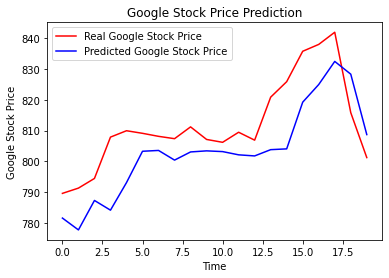

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()